In [1]:
# Autoreload
%load_ext autoreload
%autoreload 2
from glob import glob
import json
import sys
import os
import numpy as np

In [5]:
base='../data'
# Find all the json files recursively
json_files = glob(base + '/**/*.json', recursive=True)
npz_files = glob(base + '/**/*.npz', recursive=True)
png_files = glob(base + '/**/*.png', recursive=True)
print(f'Found {len(json_files)} json files')
print(f'Found {len(npz_files)} npz files')
print(f'Found {len(png_files)} png files')

Found 1626 json files
Found 1626 npz files
Found 1626 png files


In [ ]:
# for png_file in png_files:
#     a=png_file.replace('.png','.npz')
#     if a not in npz_files:
#         print(f'Removing {png_file} not in npz_files')
#         #os.remove(json_file)
        
# json_files = glob(base + '/**/*.json', recursive=True)
# npz_files = glob(base + '/**/*.npz', recursive=True)
# png_files = glob(base + '/**/*.png', recursive=True)

Removing ../data/mandarins/clementine/KDC/20220803_230703_CLEMENTINE_Encoder_rot/20250217_1641_002007.png not in npz_files


In [4]:
# json_files = glob(base + '/**/*.json', recursive=True)
# npz_files = glob(base + '/**/*.npz', recursive=True)
# png_files = glob(base + '/**/*.png', recursive=True)

# for file in json_files+npz_files+png_files:   
#     if " " in file:
#         an=os.path.basename(file)
#         b=an.replace(" ","_")
#         b=os.path.join(os.path.dirname(file),b)
#         print(f'Renaming: {file} --> {b}')
#         os.rename(file,b)
# json_files = glob(base + '/**/*.json', recursive=True)
# npz_files = glob(base + '/**/*.npz', recursive=True)
# png_files = glob(base + '/**/*.png', recursive=True)


In [5]:
# json_files = glob(base + '/**/*.json', recursive=True)
# npz_files = glob(base + '/**/*.npz', recursive=True)
# png_files = glob(base + '/**/*.png', recursive=True)

# for file in json_files+npz_files+png_files:   
#     an=os.path.basename(file)
#     if " " in an:
#         b=an.replace(" ","_")
#         b=os.path.join(os.path.dirname(file),b)
#         print(f'Renaming: {file} --> {b}')
#         os.rename(file,b)
# json_files = glob(base + '/**/*.json', recursive=True)
# npz_files = glob(base + '/**/*.npz', recursive=True)
# png_files = glob(base + '/**/*.png', recursive=True)

In [6]:


def rename_directories_recursive(root_dir):
    """
    Recursively renames all directories under root_dir, replacing spaces with underscores.

    Args:
        root_dir (str): The root directory to start the renaming process.
    """

    changed= True
    while changed:
        changed=False
        for dirpath, dirnames, filenames in os.walk(root_dir):
            for dirname in dirnames:
                if " " in dirname:
                    old_path = os.path.join(dirpath, dirname)
                    new_dirname = dirname.replace(" ", "_")
                    new_path = os.path.join(dirpath, new_dirname)

                    try:
                        os.rename(old_path, new_path)
                        print(f"Renamed: {old_path} -> {new_path}")
                        changed=True
                    except OSError as e:
                        print(f"Error renaming {old_path}: {e}")
                    changed=True
            if changed:
                break
    

In [7]:
#rename_directories_recursive(base)

In [6]:
json_files = glob(base + '/**/*.json', recursive=True)

defectos_set=set()
for json_file in json_files:
    try:
        with open(json_file, 'r') as f:
            data = json.load(f)
            anotaciones=data['annotations']
            defectos=list(anotaciones.keys())
            defectos_set.update(defectos)
            
    except:
        print(f'Error reading {json_file}')
print(f'Found {len(defectos_set)} defectos')
print(defectos_set)

Found 19 defectos
{'oil_spots', 'bleaching', 'scars', 'plu_stickers', 'green', 'skin_breakdown', 'cracks', 'deformed_peduncle', 'insect', 'mechanical_damage', 'hollow', 'skin_creasing', 'sun_burn', 'deformed_counterpeduncle', 'rotten', 'reddish', 'light_scars', 'surface', 'damage_by_pliers'}


In [7]:
json_files = glob(base + '/**/*.json', recursive=True)

cantidad_defectos=np.zeros(len(defectos_set)+1)
defectos_set=list(defectos_set)
defectos_set.sort()
cuenta={ defecto:0 for defecto in defectos_set}
print(cuenta)
cuenta['sin_anot']=0
cuenta['mas_de_una']=0

listas_por_defecto={ defecto:[] for defecto in defectos_set}
for json_file in json_files:
    try:
        with open(json_file, 'r') as f:
            data = json.load(f)
            anotaciones=data['annotations']
            suma=0
            for k,v in anotaciones.items():
                if v=='1' or v==1:
                    suma+=1
                    listas_por_defecto[k].append(json_file)
            cantidad_defectos[suma]+=1
            
            
    except:
        print(f'Error reading {json_file}')
for json_file in json_files:
    try:
        with open(json_file, 'r') as f:
            data = json.load(f)
            anotaciones=data['annotations']
            nada=True
            c=0
            for k,v in anotaciones.items():
                if v=='1' or v==1:
                    cuenta[k]+=1
                    nada=False
                    listas_por_defecto[k].append(json_file)
                    c+=1
            if nada:
                cuenta['sin_anot']+=1
            if c>1:
                cuenta['mas_de_una']+=1
            
    except:
        print(f'Error reading {json_file}')

print(cuenta)
print("Total frutos: ", len(json_files))
for d in cuenta:
    print(f'{d}: {cuenta[d]}')


{'bleaching': 0, 'cracks': 0, 'damage_by_pliers': 0, 'deformed_counterpeduncle': 0, 'deformed_peduncle': 0, 'green': 0, 'hollow': 0, 'insect': 0, 'light_scars': 0, 'mechanical_damage': 0, 'oil_spots': 0, 'plu_stickers': 0, 'reddish': 0, 'rotten': 0, 'scars': 0, 'skin_breakdown': 0, 'skin_creasing': 0, 'sun_burn': 0, 'surface': 0}
{'bleaching': 11, 'cracks': 56, 'damage_by_pliers': 79, 'deformed_counterpeduncle': 10, 'deformed_peduncle': 166, 'green': 148, 'hollow': 62, 'insect': 20, 'light_scars': 275, 'mechanical_damage': 71, 'oil_spots': 101, 'plu_stickers': 107, 'reddish': 50, 'rotten': 145, 'scars': 224, 'skin_breakdown': 188, 'skin_creasing': 14, 'sun_burn': 0, 'surface': 351, 'sin_anot': 353, 'mas_de_una': 586}
Total frutos:  1626
bleaching: 11
cracks: 56
damage_by_pliers: 79
deformed_counterpeduncle: 10
deformed_peduncle: 166
green: 148
hollow: 62
insect: 20
light_scars: 275
mechanical_damage: 71
oil_spots: 101
plu_stickers: 107
reddish: 50
rotten: 145
scars: 224
skin_breakdown:

In [8]:
# Busqueda de basenames duplicados
json_files = glob(base + '/**/*.json', recursive=True)
basenames=set()
duplicados=[]
for json_file in json_files:
    an=os.path.basename(json_file)
    if an in basenames:
        duplicados.append(json_file)
    else:
        basenames.add(an)
print(f'Found {len(duplicados)} duplicados')
for d in duplicados:
    print(d)

Found 0 duplicados


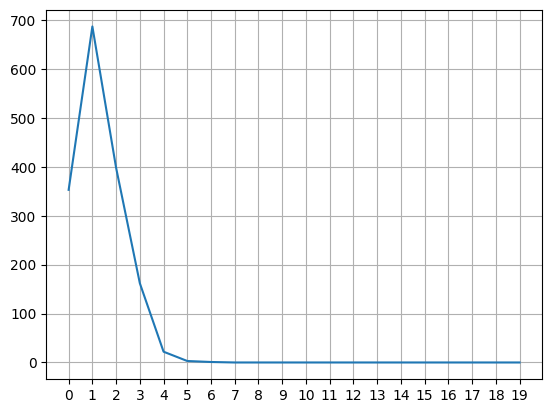

In [9]:
import matplotlib.pyplot as plt
_=plt.plot(cantidad_defectos)
_=plt.xticks(range(len(cantidad_defectos)))
_=plt.grid()

<function matplotlib.pyplot.ylim(*args, **kwargs) -> 'tuple[float, float]'>

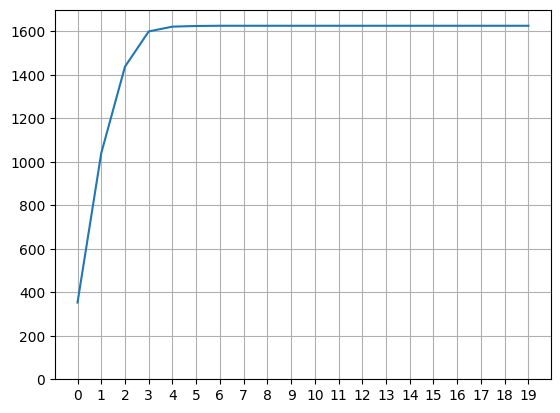

In [10]:
_=plt.plot(np.cumsum(cantidad_defectos))
_=plt.ylim(0, 1700)
_=plt.xticks(range(len(cantidad_defectos)))
_=plt.grid()
plt.ylim